In [1]:
from importlib import reload
from IPython.display import display
import numpy as np
from os.path import join
import sys
import os
import functools
import sys
import h5py
from matplotlib import pyplot
from PIL import Image

In [2]:
import ipywidgets as widgets
from IPython.display import display

In [3]:
%matplotlib ipympl

In [4]:
from torch.utils.data import Subset
from torchvision.transforms import Compose

In [5]:
from trackertraincode.datasets.dshdf5pose import Hdf5PoseDataset
from trackertraincode import vis
from trackertraincode import utils
from trackertraincode import datatransformation as dtr

/opt/conda-env/paper/lib/python3.11/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


In [6]:
datadir = os.environ['DATADIR']

In [7]:
def visualize_in_notebook(ds):
    fig, ax = pyplot.subplots(1,1,figsize=(15,5))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    pyplot.tight_layout()

    @widgets.interact(index=(0,len(ds)-1))
    def plot_image(index):
        smpl = dtr.batch.to_numpy(ds[index])
        img = vis.draw_dataset_sample(smpl)
        #display(Image.fromarray(img))
        ax.clear()
        ax.imshow(img)
        pyplot.draw()

interactive(children=(IntSlider(value=30612, description='index', max=61224), Output()), _dom_classes=('widget…

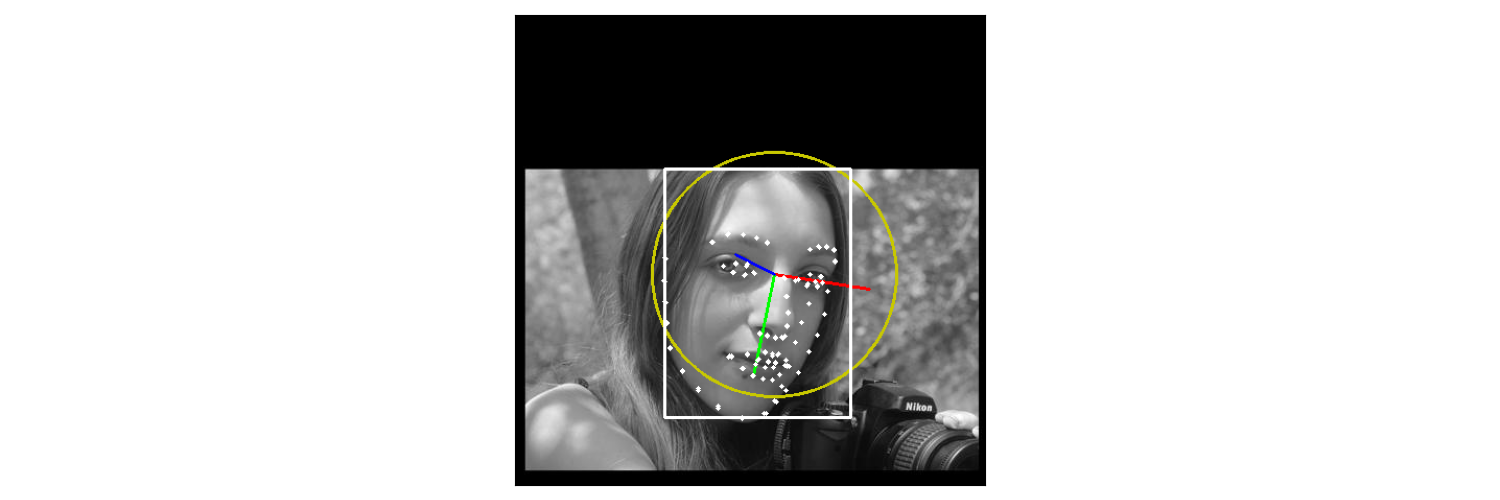

In [8]:
visualize_in_notebook(
    Hdf5PoseDataset(join(datadir,'300wlp.h5')))

interactive(children=(IntSlider(value=31548, description='index', max=63097), Output()), _dom_classes=('widget…

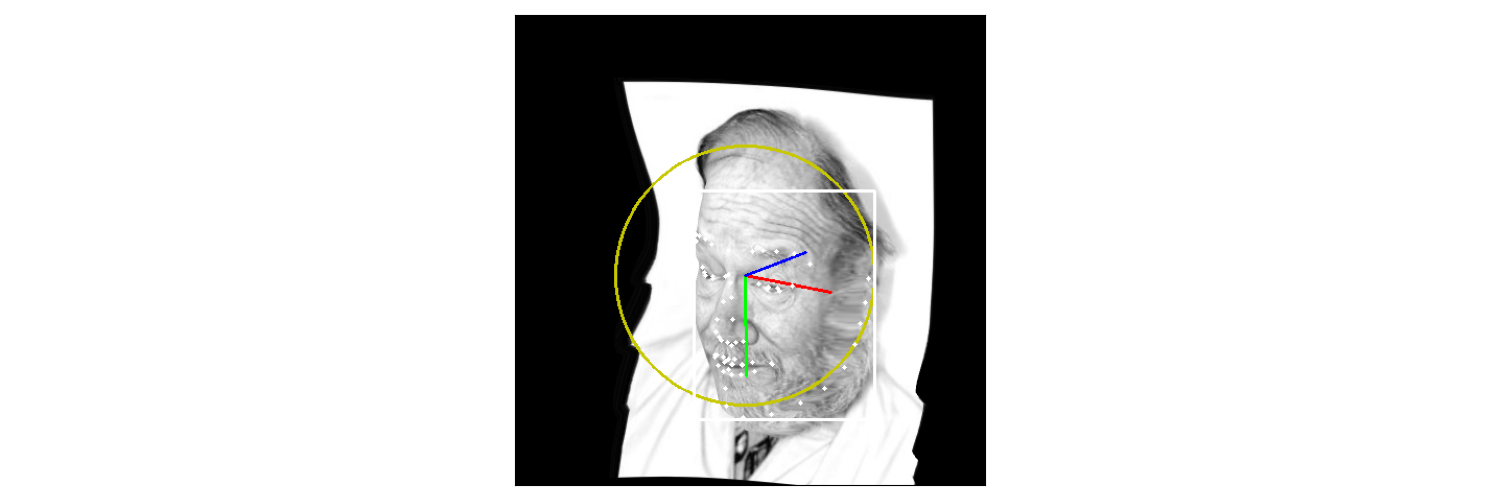

In [9]:
visualize_in_notebook(
    Hdf5PoseDataset(join(datadir,'reproduction_300wlp-v12.h5')))

interactive(children=(IntSlider(value=49992, description='index', max=99985), Output()), _dom_classes=('widget…

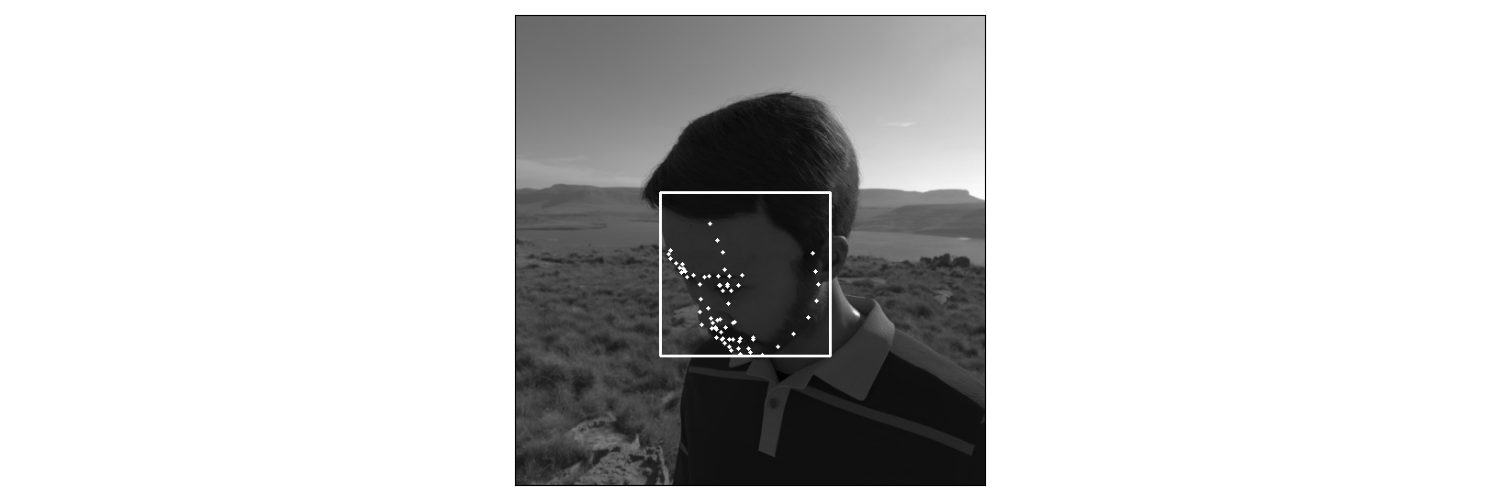

In [10]:
visualize_in_notebook(
    Hdf5PoseDataset(join(datadir,'microsoft_synface_100000-v1.1.h5')))

interactive(children=(IntSlider(value=49999, description='index', max=99999), Output()), _dom_classes=('widget…

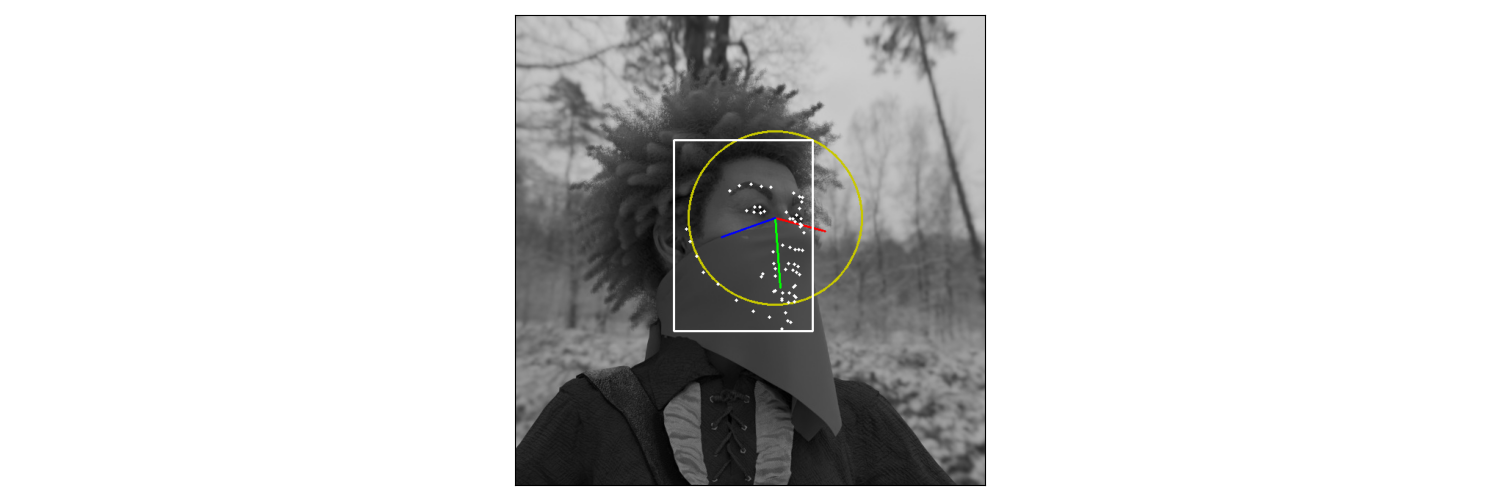

In [12]:
visualize_in_notebook(
    Hdf5PoseDataset(join(datadir,'replicant-face-v4-wider-100k.h5')))

interactive(children=(IntSlider(value=4999, description='index', max=9999), Output()), _dom_classes=('widget-i…

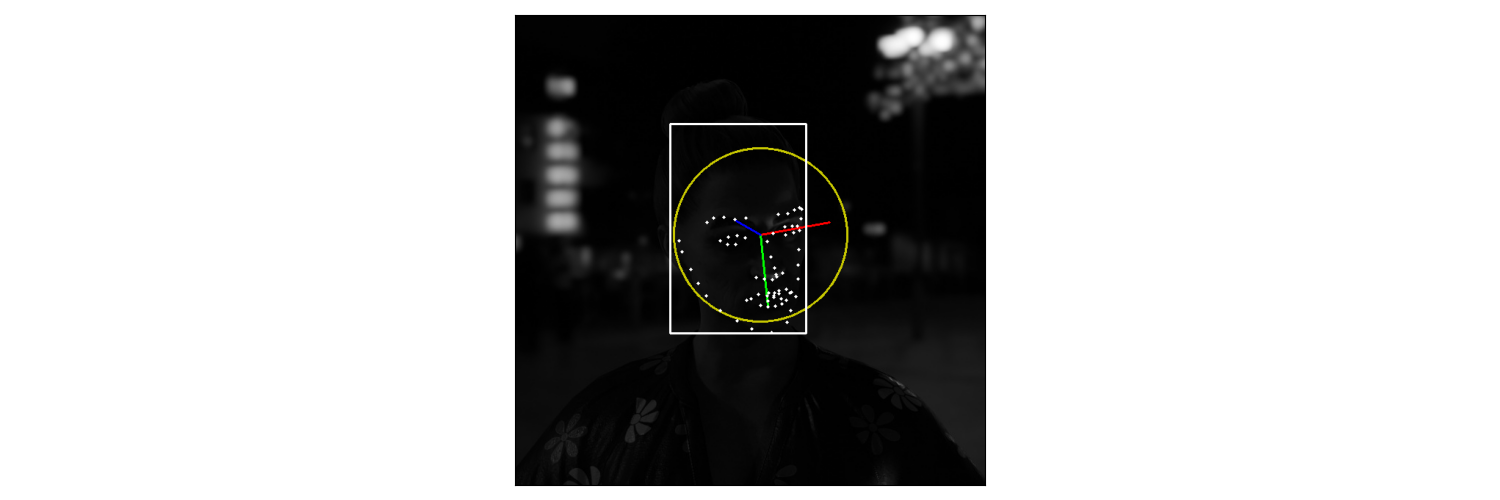

In [13]:
visualize_in_notebook(
    Hdf5PoseDataset(join(datadir,'replicant-face-v4-eval-10k.h5')))

interactive(children=(IntSlider(value=11299, description='index', max=22598), Output()), _dom_classes=('widget…

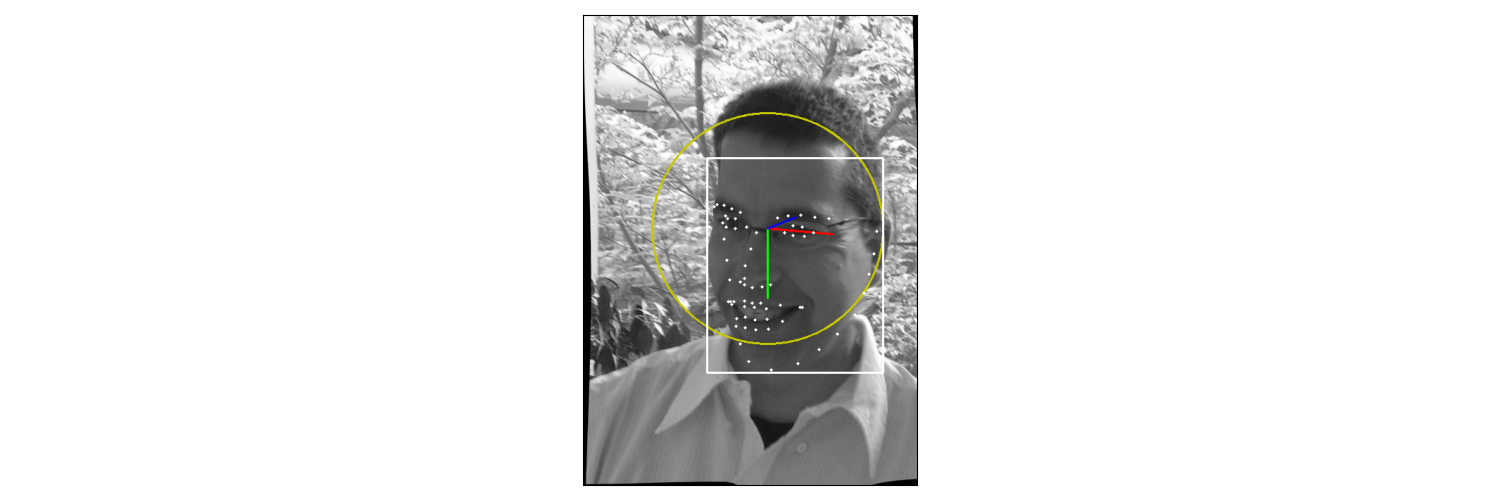

In [14]:
visualize_in_notebook(
    Hdf5PoseDataset(join(datadir,'wflw_augmented_v4.h5')))

interactive(children=(IntSlider(value=38278, description='index', max=76556), Output()), _dom_classes=('widget…

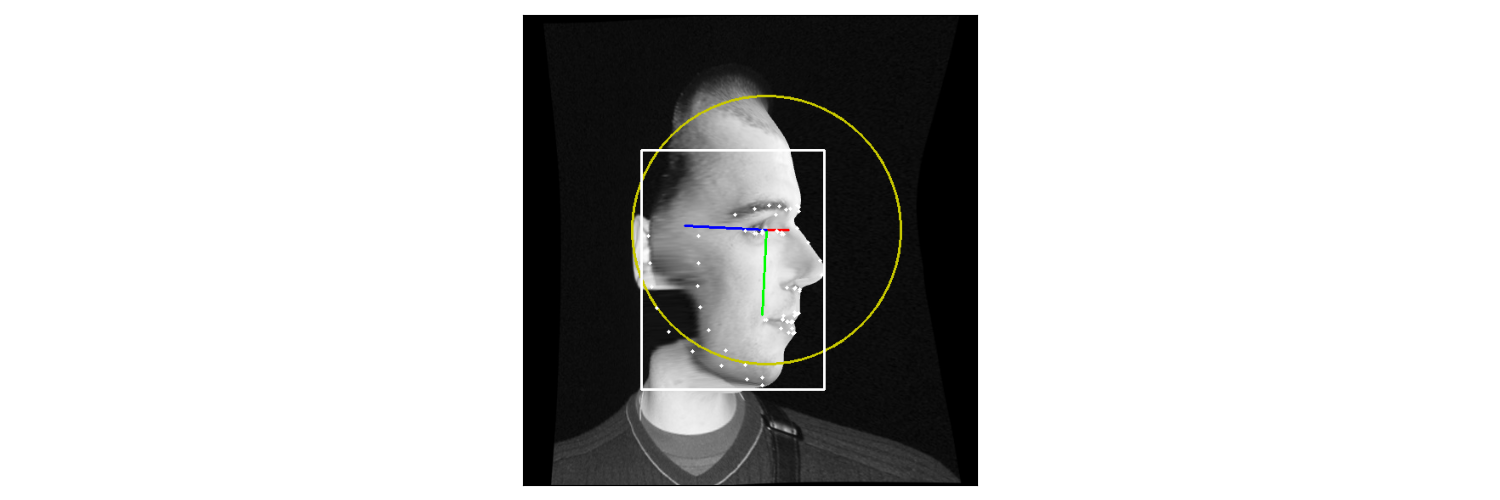

In [15]:
visualize_in_notebook(
    Hdf5PoseDataset(join(datadir,'lapa-megaface-augmented-v2.h5')))

interactive(children=(IntSlider(value=160415, description='index', max=320830), Output()), _dom_classes=('widg…

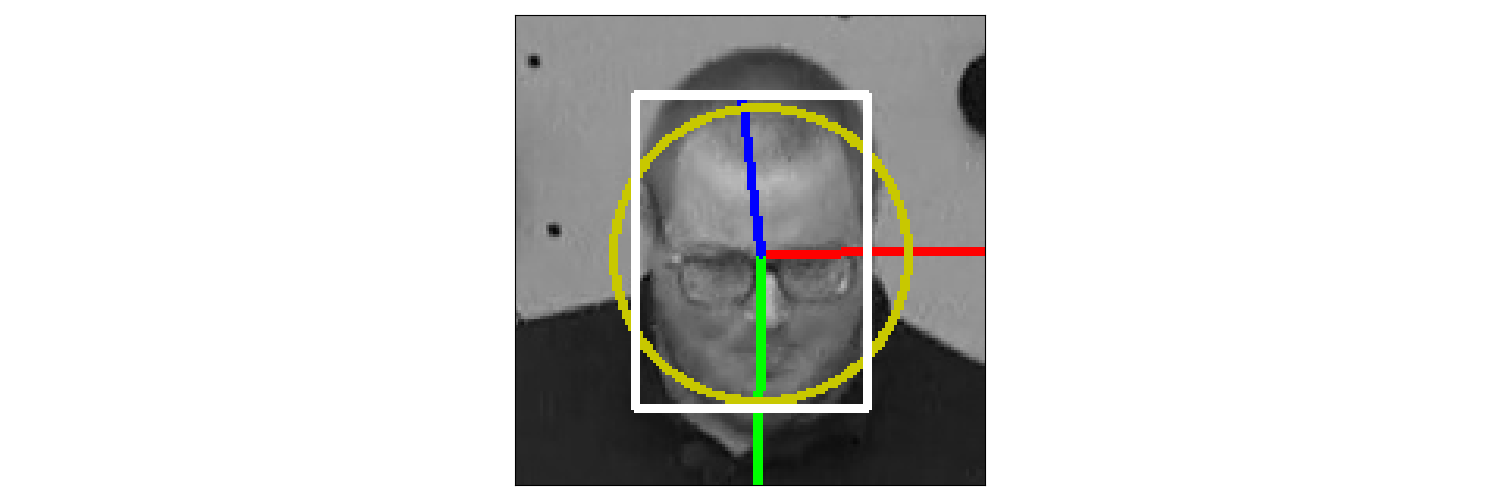

In [16]:
visualize_in_notebook(
    Hdf5PoseDataset(join(datadir,'panoptic_sv.h5')))

interactive(children=(IntSlider(value=7, description='index', max=15), Output()), _dom_classes=('widget-intera…

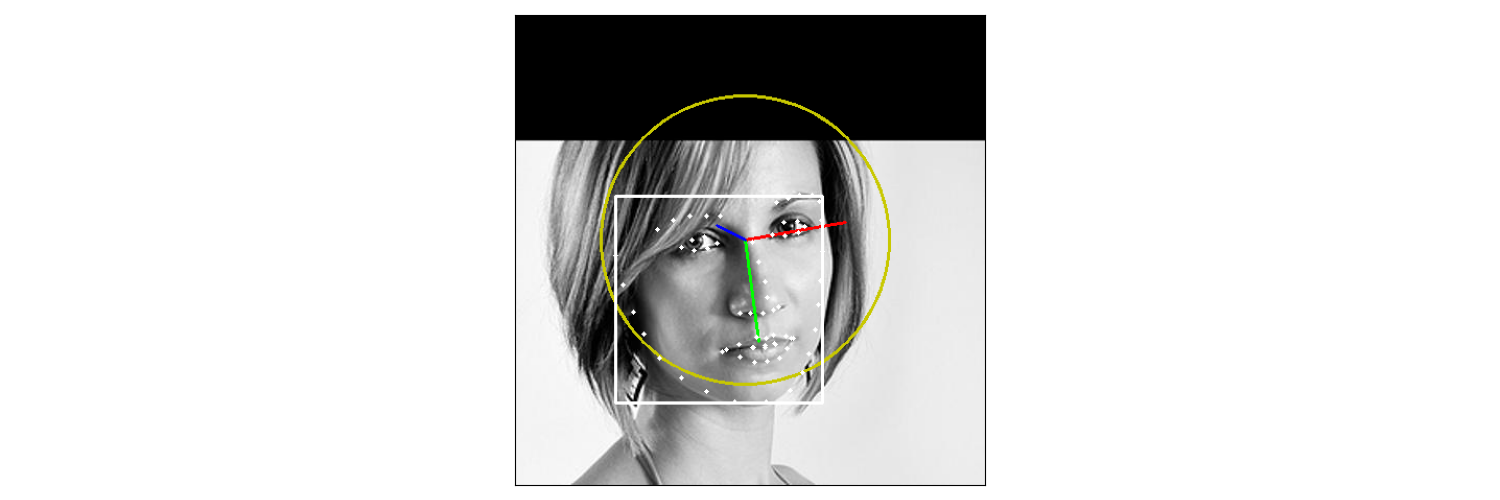

In [17]:
visualize_in_notebook(Hdf5PoseDataset('../aflw2kmini.h5'))

interactive(children=(IntSlider(value=999, description='index', max=1999), Output()), _dom_classes=('widget-in…

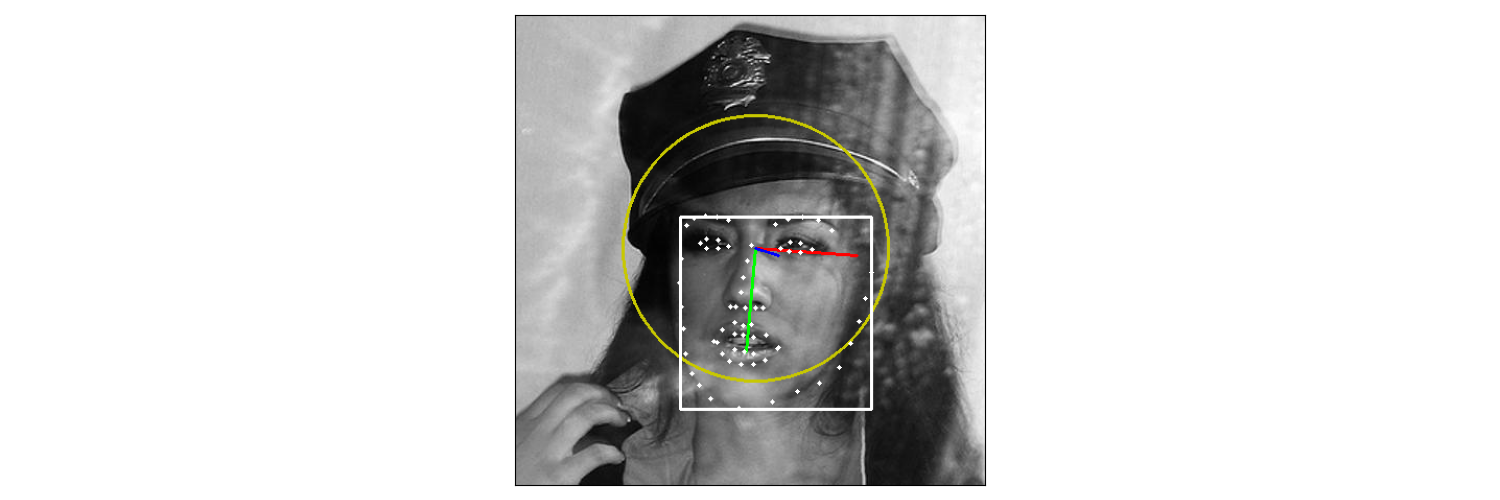

In [18]:
visualize_in_notebook(
    Hdf5PoseDataset(join(datadir,'aflw2k.h5')))

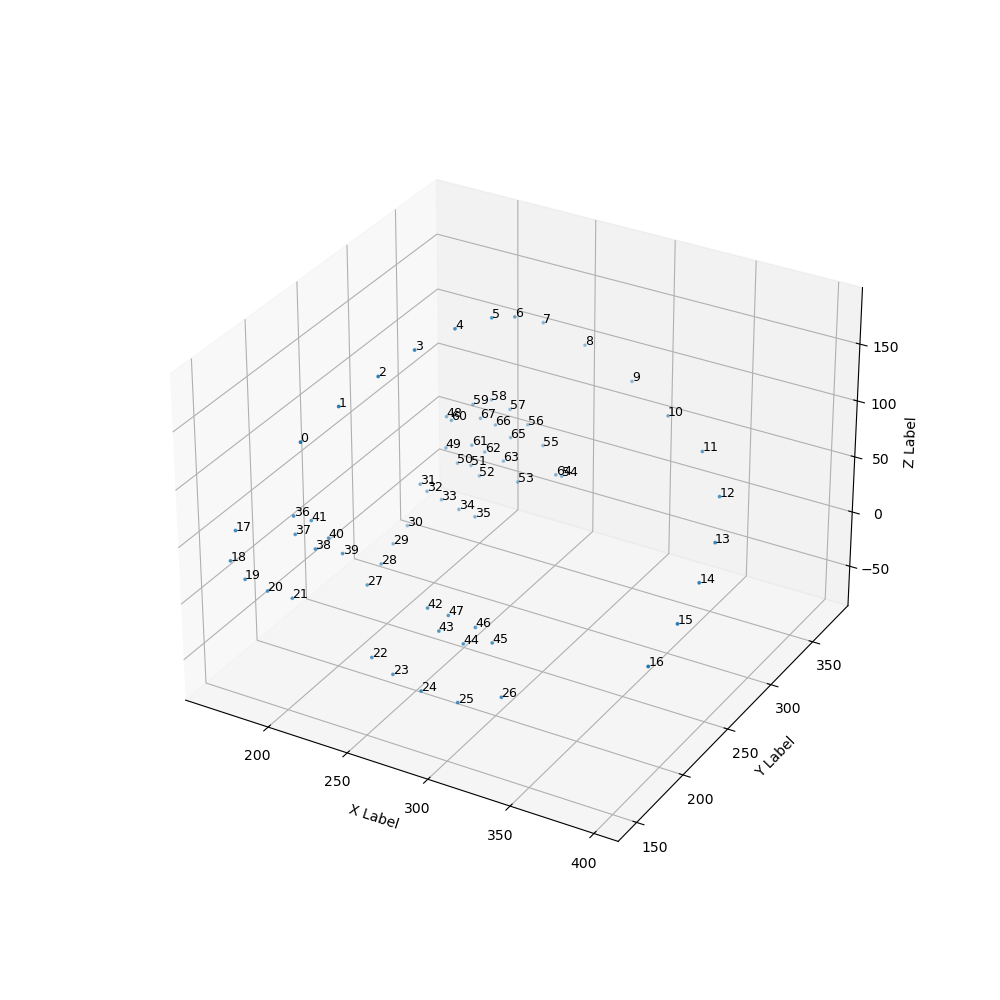

In [19]:
ds2 = Hdf5PoseDataset(join(datadir,'aflw2k.h5'))

fig = pyplot.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for ds in [ds2]:
    smpl = next(iter(ds))
    landmarks = smpl['pt3d_68']
    vis.plot3dlandmarks(ax, landmarks)

pyplot.show()

In [69]:
def draw_sample(sample):
    img = vis._with3channels_hwc(sample['image']).copy()
    if 'pose' in sample and 'coord' in sample:
        vis.draw_pose(img, sample, linewidth=1, color=None)
    if 'roi' in sample:
        roi = sample['roi']
        vis.draw_roi(img, roi, (200,0,0), 1)
    if 'pt3d_68' in sample:
        vis.draw_points3d(img, sample['pt3d_68'], 1, (0,0,0))
    return img

def random_collage(ds):
    rows, cols = 3, 4
    indices = np.random.choice(np.arange(len(ds)), size=rows*cols, replace=False)
    imgs = [ draw_sample(ds[idx]) for idx in indices ]
    imgs = np.asarray(imgs)
    imgs = np.reshape(imgs,(rows,cols)+imgs.shape[1:])
    imgs = [ np.concatenate(row,axis=1) for row in imgs ]
    imgs = np.concatenate(imgs, axis=0)
    return Image.fromarray(imgs)

In [41]:
ds = Hdf5PoseDataset(join(datadir,'wflw_augmented_v4.h5'), monochrome=False, transform=Compose([dtr.batch.FocusRoi(256,1.5), dtr.batch.to_numpy]))

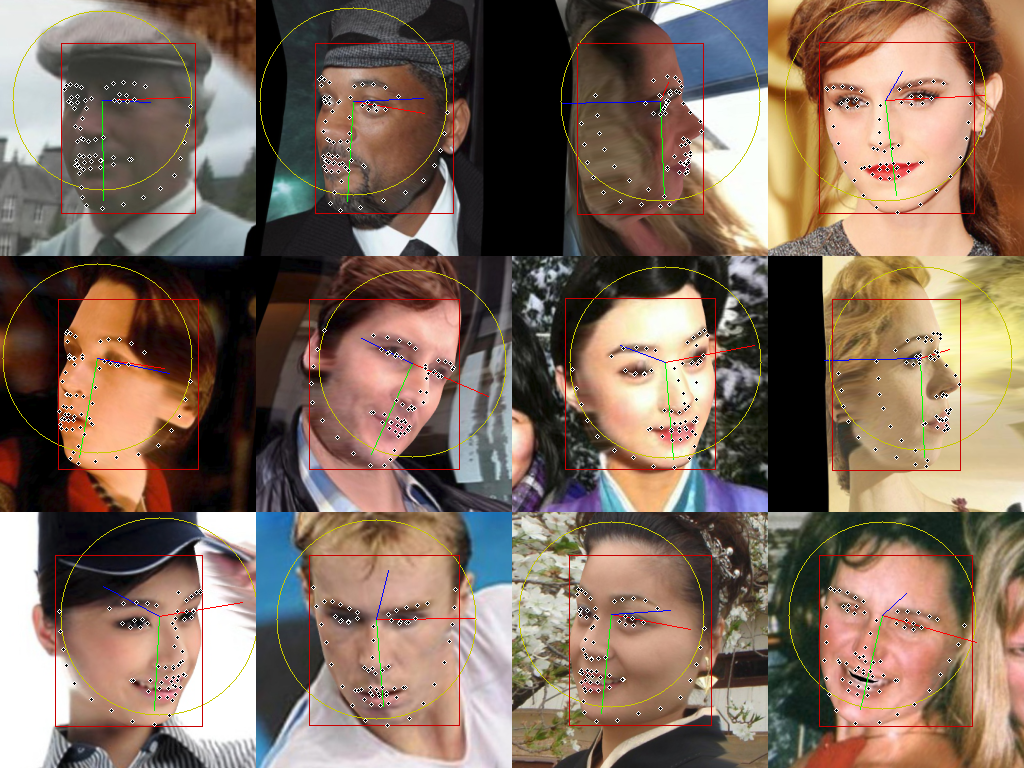

In [71]:
display(random_collage(ds))

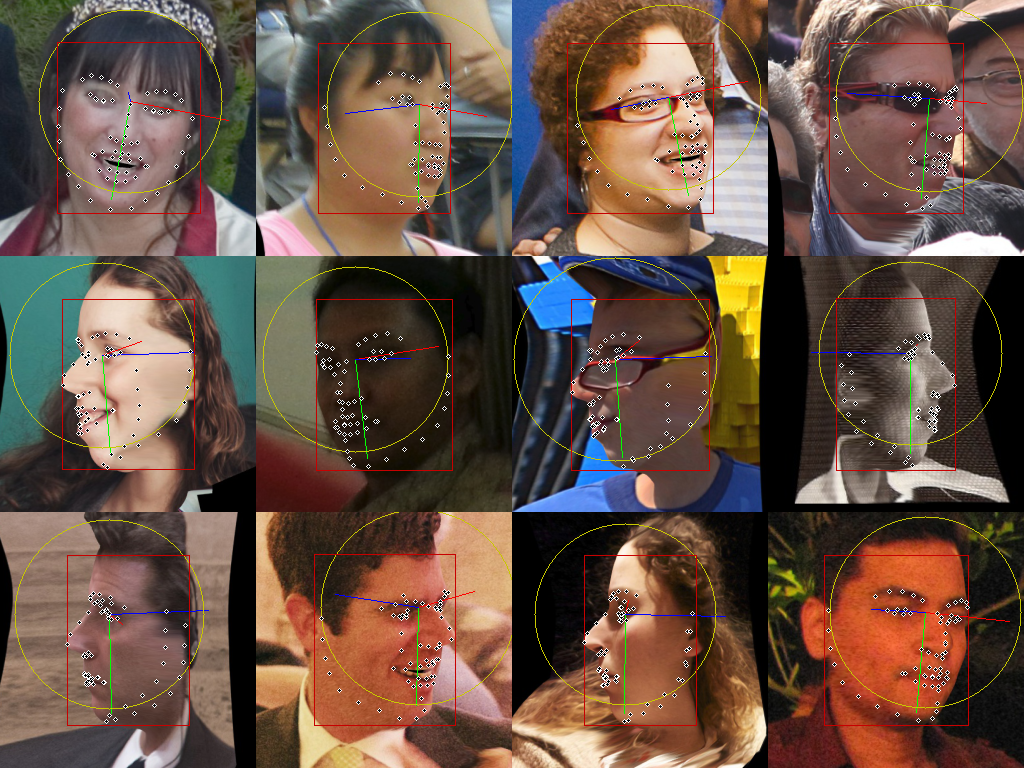

In [75]:
ds = Hdf5PoseDataset(join(datadir,'lapa-megaface-augmented-v2.h5'), monochrome=False, transform=Compose([dtr.batch.FocusRoi(256,1.5), dtr.batch.to_numpy]))
display(random_collage(ds))